<a href="https://colab.research.google.com/github/yeyomuri/curso_profesional_de_tensorflow/blob/main/cargar_multiples_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

In [3]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip \
    -O /tmp/databasesLoadData.zip


--2022-07-14 15:13:25--  https://storage.googleapis.com/platzi-tf2/databasesLoadData.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71662510 (68M) [application/zip]
Saving to: ‘/tmp/databasesLoadData.zip’

/tmp/databasesLoadD 100%[===================>]  68.34M  52.9MB/s    in 1.3s    

2022-07-14 15:13:27 (52.9 MB/s) - ‘/tmp/databasesLoadData.zip’ saved [71662510/71662510]



In [5]:
local_zip = "/tmp/databasesLoadData.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/databasesLoadData")
zip_ref.close()

In [6]:
import json
import codecs
import requests
import numpy as np 
from PIL import Image
from io import BytesIO
%matplotlib inline 
import matplotlib.pyplot as plt

In [7]:
url = "/tmp/databasesLoadData/sign_mnist_json/data.json"

In [8]:
data_json = []
with codecs.open(url, 'rU', 'utf-8') as js:
  for line in js:
    data_json.append(json.loads(line))

In [9]:
print("{} imagenes encontradas".format(len(data_json)))

9 imagenes encontradas


In [10]:
images = []
for data in data_json:
  response = requests.get(data['content'])
  img = np.asarray(Image.open(BytesIO(response.content)))
  images.append([img, data['label']])

b


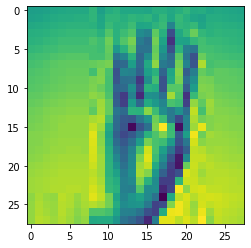

In [11]:
plt.imshow(images[0][0].reshape(28, 28))
print(images[0][1])